# Notebook 04: Feature Insights & Recommendations

This notebook concludes the project by interpreting the model’s results and translating them into strategic, business-relevant recommendations.

### Objectives of This Notebook:
- Identify and interpret key drivers of customer churn
- Communicate business-relevant takeaways from model outputs
- Offer recommendations to reduce churn
- Reassess the business objective and summarize what we accomplished

### Step 1: Import Libraries

We import the required libraries for loading the data, training the model, and visualizing feature importances.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

### Step 2: Load Cleaned Data

We load the processed training datasets that were created in notebook 02. These will be used to retrain the Random Forest model for interpretation.


In [2]:
X_train = pd.read_csv("../data/X_train_clean.csv")
X_test = pd.read_csv("../data/X_test_clean.csv")
y_train = pd.read_csv("../data/y_train_clean.csv").squeeze()
y_test = pd.read_csv("../data/y_test_clean.csv").squeeze()

### Step 3: Retrain Random Forest Model and Verify Results

We retrain the same Random Forest model as used in Notebook 03 with consistent hyperparameters and naming (`rf`) to ensure complete alignment.


In [3]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print("--- Random Forest Report ---")
print(classification_report(y_test, y_pred_rf))

roc_auc = roc_auc_score(y_test, y_prob_rf)
print(f"ROC AUC: {roc_auc:}")


--- Random Forest Report ---
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1701
           1       0.93      0.75      0.83       325

    accuracy                           0.95      2026
   macro avg       0.94      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026

ROC AUC: 0.9857459413014968


This result exactly matches our previous output from notebook 03, ensuring that the model has been trained in the same manner.

### Step 4: Extract and Plot Feature Importances

Once the model is retrained, we extract the feature importances and visualize the top 10. This tells us which customer behaviors are most predictive of churn.


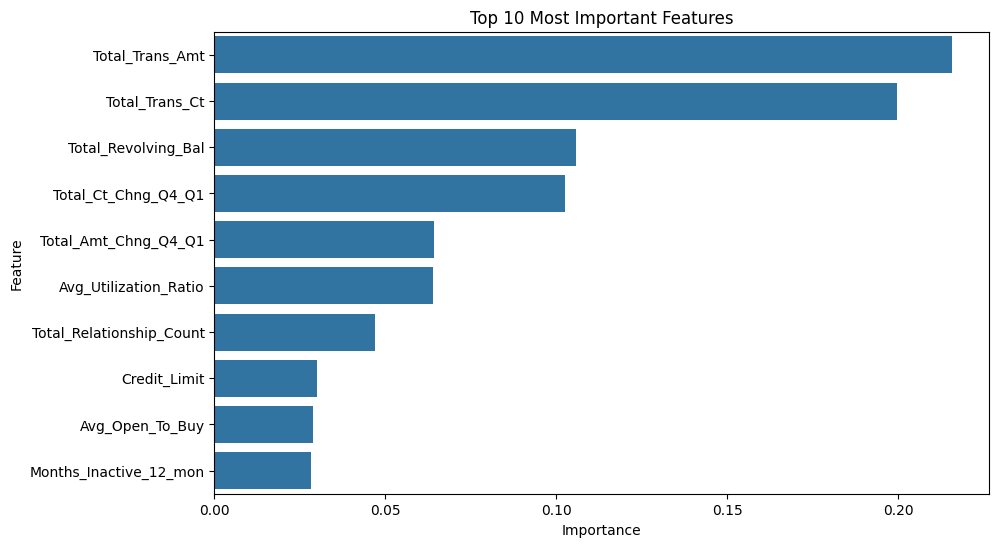

In [4]:
importances = rf.feature_importances_
feat_names = X_train.columns
importance_df = pd.DataFrame({"Feature": feat_names, "Importance": importances})
importance_df = importance_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), y="Feature", x="Importance")
plt.title("Top 10 Most Important Features")
plt.show()

 This plot shows the top 10 features contributing most to churn predictions.

- **Total Transction Amount & Total Transaction Count**: The most important indicators. Lower values suggest reduced engagement and higher risk of churn.
- **Total Revolving Balance**: Higher balances may reflect dissatisfaction or financial stress.
- **Total Count Change & Total Amount Change**: Capture shifts in usage - declining values indicate disengagement.
- **Average Utilization Ratio**: High utilization suggests stress or unmet financial needs.
- **Months Inactive**: Inactivity is a strong churn signal.

This confirms that behavioral features related to usage and engagement are the most predictive churn indicators.


### Step 5: Strategic Recommendations

Based on the feature importance analysis, here are several data-driven actions the business can take to mitigate churn:
1. Identify customers with declining transaction volume or frequency and engage them with personalized campaigns (e.g., bonus points, cashback offers, or reminders).
    - Low transaction activity is the strongest signal of churn, and these users may be shifting spending to another card or disengaging entirely.
2. Focus on users with high revolving balances and high utilization ratios. They may be frustrated with limits or experiencing financial stress.
    - Offer limit reviews, balance transfer promos, flexible payments or financial planning tools.
3. Encourage cross-product adoption (e.g., checking, savings, auto loans) for customers with few relationships. 
    - More product engagement reduces churn
4. Target dormant users (high inactivity) with time-limited perks, exclusive campaigns, or credit line adjustments.
    - Customers with low open credit or long periods of inactivity may be at risk. Segment these users and re-engage them.

### Step 6: So... Did We Solve the Business Objective?

**Yes.** Our original goal was to predict churn and understand its key drivers. We achieved this by:
- Training a strong-performing model (**Random Forest AUC ≈ 0.99**)
- Revealing which behaviors most strongly signal churn risk
- Translating those insights into business actions that support customer retention

### Step 7: Potential Future Analyses

Future work could explore time-based patterns in customer behavior, incorporate customer lifetime value, or apply advanced interpretability tools to better understand feature interactions. Additional data sources such as customer satisfaction scores, support interactions, or marketing engagement could also provide a more complete picture of why customers leave and how to better retain them.
